Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import json

In [3]:
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [4]:
from geopy.geocoders import Nominatim

In [5]:
!pip install folium
import folium

In [6]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/Umasankar1987/Capstone-Project---The-Battle-of-Neighborhoods-/main/Indian%20House%20Prices.csv')
raw_data.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
0,0,300.00,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.265594,76.646540
1,1,83.58,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.971319,77.696477
2,2,68.45,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.917657,77.483757
3,3,67.97,1220,Horamavu,2.0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.027331,77.660151
4,4,200.00,2502,Thanisandra,4.0,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.054713,77.633926


Data cleaning

In [7]:
data = raw_data.drop(['Unnamed: 0'], axis = 1)
data.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
0,300.00,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.265594,76.646540
1,83.58,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.971319,77.696477
2,68.45,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.917657,77.483757
3,67.97,1220,Horamavu,2.0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.027331,77.660151
4,200.00,2502,Thanisandra,4.0,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.054713,77.633926


Select 'Chennai' from the list as we are going to analyze Chennai's data

In [8]:
df_chennai = data[data['City'] == 'Chennai']
df_chennai.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
1708,55.00,1310,Perungalathur,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chennai,12.914545,80.087955
1709,53.50,1126,Madhavaram,2.0,0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chennai,13.142931,80.232517
1710,82.05,1307,Karapakkam,3.0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chennai,12.911707,80.227720
1711,29.50,576,Mevalurkuppam,1.0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chennai,13.028020,80.007207
1712,76.00,1207,Kolapakkam,3.0,0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chennai,13.009707,80.152899


In [9]:
df_chennai.shape

(2047, 43)

In [10]:
df_chennai.reset_index(drop = True, inplace = True)
df_chennai.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
0,55.00,1310,Perungalathur,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chennai,12.914545,80.087955
1,53.50,1126,Madhavaram,2.0,0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chennai,13.142931,80.232517
2,82.05,1307,Karapakkam,3.0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chennai,12.911707,80.227720
3,29.50,576,Mevalurkuppam,1.0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chennai,13.028020,80.007207
4,76.00,1207,Kolapakkam,3.0,0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chennai,13.009707,80.152899


We are going to select house which have 3 bedrooms.

In [11]:
df_chennai1 = df_chennai[df_chennai.Longitude != 0.0000][['Location', 'Area', 'Price', 'No. of Bedrooms', 'Latitude', 'Longitude']]
df_chennai1.rename(columns = {'No. of Bedrooms': 'Bedrooms'}, inplace = True)
df_chennai1 = df_chennai1[df_chennai1['Bedrooms'] >= 3]
df_chennai1



,Location,Area,Price,Bedrooms,Latitude,Longitude
0,Perungalathur,1310,55.00000,3.0,12.914545,80.087955
2,Karapakkam,1307,82.05000,3.0,12.911707,80.227720
4,Kolapakkam,1207,76.00000,3.0,13.009707,80.152899
7,Puzhal,1345,63.21000,3.0,13.163649,80.203807
9,Thoraipakkam OMR,1508,116.00000,3.0,12.930069,80.230022
11,Anna Nagar,1565,242.00000,3.0,13.087200,80.216442
14,Mogappair,1479,96.13000,3.0,13.083514,80.184078
15,Sholinganallur,1640,75.42000,3.0,12.917443,80.216490
18,Perungalathur,1310,55.00000,3.0,12.914545,80.087955
20,Karapakkam,1307,82.05000,3.0,12.911707,80.227720


In [12]:
df_chennai1.shape

(738, 6)

We are going to affordable house so let us pick house price upto 100Lakhs. Note: All prices are marked in Lakhs in this dataset

In [13]:
price_n = list(df_chennai1.Price.unique())
bedrooms_n = list(df_chennai1.Bedrooms)

price_chennai = []

for i in price_n:
    if i <= 100:
        price_chennai.append(i)
price_chennai

[55.0,
 82.05,
 76.0,
 63.21,
 96.13,
 75.42,
 51.84,
 100.0,
 62.25,
 86.75,
 34.0,
 59.99,
 80.0,
 91.1,
 59.78,
 60.0,
 90.86,
 95.0,
 68.0,
 64.63,
 64.09999,
 52.61,
 90.0,
 97.46,
 62.03,
 79.36,
 81.08,
 82.48999,
 85.25,
 97.99,
 81.36,
 98.31,
 98.18,
 84.62,
 72.95999,
 85.07,
 75.5,
 77.0,
 72.8,
 64.95,
 67.91,
 72.89,
 76.42,
 86.46,
 84.94,
 84.21,
 93.57,
 84.31,
 84.73,
 86.57,
 82.37,
 86.8,
 81.58,
 89.2,
 85.56,
 77.84999,
 78.41,
 85.63,
 89.81,
 66.29,
 77.8,
 71.63,
 96.12,
 69.67,
 76.2,
 59.08,
 81.31,
 62.4,
 58.05,
 85.0,
 60.54,
 57.58,
 59.37,
 61.17,
 58.16,
 47.5,
 50.25,
 95.48,
 91.58,
 82.22,
 83.53,
 72.52,
 99.56,
 95.5,
 93.87,
 94.0,
 65.0,
 71.5,
 41.65,
 61.36,
 57.08,
 62.01,
 55.02,
 59.95,
 96.62,
 96.87,
 92.0,
 64.0,
 72.0,
 66.0,
 55.29,
 87.92,
 88.36,
 91.19,
 87.21,
 90.55,
 97.41,
 92.76,
 97.59,
 92.29,
 59.0,
 57.0,
 58.61,
 61.38,
 64.76,
 82.14,
 64.34,
 40.11999,
 56.47,
 96.43,
 98.61,
 99.25,
 78.0,
 80.43,
 45.19,
 52.44,
 58.7,


Remove the duplicates

In [14]:
df_chennai2 = df_chennai1[df_chennai1['Price'].isin(price_chennai)].reset_index(drop=True)
df_chennai2.drop_duplicates(keep = 'first', inplace = True)
df_chennai2.reset_index(drop = True, inplace = True)
df_chennai2




,Location,Area,Price,Bedrooms,Latitude,Longitude
0,Perungalathur,1310,55.00000,3.0,12.914545,80.087955
1,Karapakkam,1307,82.05000,3.0,12.911707,80.227720
2,Kolapakkam,1207,76.00000,3.0,13.009707,80.152899
3,Puzhal,1345,63.21000,3.0,13.163649,80.203807
4,Mogappair,1479,96.13000,3.0,13.083514,80.184078
5,Sholinganallur,1640,75.42000,3.0,12.917443,80.216490
6,Pammal,1080,51.84000,3.0,12.973794,80.140800
7,Maraimalai Nagar,1943,100.00000,3.0,12.795960,80.027128
8,Madambakkam,1245,62.25000,3.0,12.905719,80.154386
9,Nandambakkam,1641,86.75000,3.0,13.016648,80.191188


Use geopy library to get the latitude and longitude values of Chennai.

In [15]:
address = 'Chennai'
geolocator = Nominatim(user_agent = "ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical positions of Chennai are {}, {}.'.format(latitude,longitude))

The geographical positions of Chennai are 13.0836939, 80.270186.


Create a map of Chennai with neighborhoods superimposed on top.

In [16]:
map_chennai = folium.Map(location = [latitude, longitude], zoom_start = 10)

for lat, lng, location in zip(df_chennai2['Latitude'], df_chennai2['Longitude'], df_chennai2['Location']):
    label = '{}'.format(location)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat,lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_chennai)
map_chennai    
    

Define Foursquare Credentials and Version

In [17]:
CLIENT_ID = 'KLIY1210XBQ5L30GUCGEVSTVU05TBESC5DCQ2DI2OXIXTHGU' 
CLIENT_SECRET = 'AJSIPKC0WB2LBW2OMSXY2EFJ4RH0LHSABXJAXCIF0SPGK4N1' 
VERSION = '20180605' 
LIMIT = 100 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KLIY1210XBQ5L30GUCGEVSTVU05TBESC5DCQ2DI2OXIXTHGU
CLIENT_SECRET:AJSIPKC0WB2LBW2OMSXY2EFJ4RH0LHSABXJAXCIF0SPGK4N1


In [18]:
df_chennai2.loc[0, 'Location']

'Perungalathur'

In [19]:
df_latitude = df_chennai1.loc[0, 'Latitude'] 
df_longitude = df_chennai1.loc[0, 'Longitude'] 

df_name = df_chennai1.loc[0, 'Location'] 

print('Latitude and longitude values of {} are {}, {}.'.format(df_name, 
                                                               df_latitude, 
                                                               df_longitude))

Latitude and longitude values of Perungalathur are 12.9145454, 80.0879549.


Now, let's get the top 100 venues that are in Perungalathur within a radius of 500 meters.

In [20]:
LIMIT = 100 
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    df_latitude, 
    df_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=KLIY1210XBQ5L30GUCGEVSTVU05TBESC5DCQ2DI2OXIXTHGU&client_secret=AJSIPKC0WB2LBW2OMSXY2EFJ4RH0LHSABXJAXCIF0SPGK4N1&v=20180605&ll=12.9145454,80.0879549&radius=500&limit=100'

In [21]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60c369d1fdc1b75065a3b471'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Tambaram',
  'headerFullLocation': 'Tambaram',
  'headerLocationGranularity': 'city',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 12.919045404500004,
    'lng': 80.0925630684602},
   'sw': {'lat': 12.910045395499996, 'lng': 80.0833467315398}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '521700b611d22a75d81cc12c',
       'name': 'Amul Icecream Parlour',
       'location': {'lat': 12.910944980084572,
        'lng': 80.08947843308556,
        'labeledLatLngs': [{'label': 'display',
          'lat': 12.910944980084572,
    

In [22]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) 


filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]


nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)


nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-23-3b91eeffef10>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues)


,name,categories,lat,lng
0,Amul Icecream Parlour,Ice Cream Shop,12.910945,80.089478
1,VSR Sports Academy,Sports Club,12.918706,80.086660


In [24]:
 def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Location', 
                  'Location Latitude', 
                  'Location Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
chennai_venues = getNearbyVenues(names=df_chennai2['Location'],
                                   latitudes=df_chennai2['Latitude'],
                                   longitudes=df_chennai2['Longitude']
                                  )

Perungalathur
Karapakkam
Kolapakkam
Puzhal
Mogappair
Sholinganallur
Pammal
Maraimalai Nagar
Madambakkam
Nandambakkam
Kelambakkam
Kumananchavadi
Sholinganallur
Periyapanicheri
Perungudi
Manikandan Nagar
Porur
Velachery
Sholinganallur
East Tambaram
Mevalurkuppam
Medavakkam
Avadi
Perumbakkam
Medavakkam
Sholinganallur
Perumbakkam
Chromepet
T Nagar
Perungalathur
Karapakkam
Karapakkam
Karapakkam
Karapakkam
Karapakkam
Karapakkam
Karapakkam
Karapakkam
Madhavaram
Madhavaram
Kolapakkam
Kolapakkam
Pammal
Puzhal
Puzhal
Puzhal
Puzhal
Thoraipakkam OMR
Thoraipakkam OMR
Karapakkam
Karapakkam
Karapakkam
Thoraipakkam OMR
Karapakkam
Karapakkam
Thoraipakkam OMR
Karapakkam
Thoraipakkam OMR
Karapakkam
Karapakkam
Thoraipakkam OMR
Thoraipakkam OMR
Sholinganallur
Sholinganallur
Mugalivakkam
Mugalivakkam
Medavakkam
East Tambaram
East Tambaram
Maduravoyal
Sholinganallur
East Tambaram
Pammal
West Tambaram
Pallavaram
Madambakkam
Perungudi
Guindy
Navallur
Navallur
Navallur
Navallur
Navallur
Pammal
Pammal
Kolathur
K

In [26]:
print(chennai_venues.shape)
chennai_venues.head()

(1269, 7)


,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Perungalathur,12.914545,80.087955,Amul Icecream Parlour,12.910945,80.089478,Ice Cream Shop
1,Perungalathur,12.914545,80.087955,VSR Sports Academy,12.918706,80.086660,Sports Club
2,Karapakkam,12.911707,80.227720,Gourmad's Delight,12.913299,80.229193,Indian Restaurant
3,Karapakkam,12.911707,80.227720,CentrePoint,12.910621,80.228580,Indian Restaurant
4,Karapakkam,12.911707,80.227720,Hotel Centre Point Chennai,12.910297,80.228605,Hotel


In [27]:
chennai_venues.to_csv('file11.csv')

In [28]:
chennai_venues1 = pd.read_csv('file11.csv')

In [29]:
chennai_venues1.groupby('Location').count()

,Unnamed: 0,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Location,,,,,,,
Adambakkam,5,5,5,5,5,5,5
Ambattur,8,8,8,8,8,8,8
Annanagar,3,3,3,3,3,3,3
Avadi,10,10,10,10,10,10,10
Ayapakkam,5,5,5,5,5,5,5
Chengalpattu,3,3,3,3,3,3,3
Chitlapakkam,2,2,2,2,2,2,2
Chromepet,130,130,130,130,130,130,130
East Tambaram,25,25,25,25,25,25,25


In [30]:
chennai_venues2 = chennai_venues1.drop(['Unnamed: 0'], axis = 1)
chennai_venues2.head()

,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Perungalathur,12.914545,80.087955,Amul Icecream Parlour,12.910945,80.089478,Ice Cream Shop
1,Perungalathur,12.914545,80.087955,VSR Sports Academy,12.918706,80.086660,Sports Club
2,Karapakkam,12.911707,80.227720,Gourmad's Delight,12.913299,80.229193,Indian Restaurant
3,Karapakkam,12.911707,80.227720,CentrePoint,12.910621,80.228580,Indian Restaurant
4,Karapakkam,12.911707,80.227720,Hotel Centre Point Chennai,12.910297,80.228605,Hotel


In [31]:
print('There are {} uniques categories.'.format(len(chennai_venues2['Venue Category'].unique())))

There are 86 uniques categories.


In [32]:
chennai_onehot = pd.get_dummies(chennai_venues2[['Venue Category']], prefix="", prefix_sep="")

In [33]:
chennai_onehot['Location'] = chennai_venues2['Location'] 
fixed_columns = [chennai_onehot.columns[-1]] + list(chennai_onehot.columns[:-1])
chennai_onehot = chennai_onehot[fixed_columns]

In [34]:
chennai_onehot.head()

,Location,ATM,Accessories Store,American Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,Bar,Bed & Breakfast,Big Box Store,Breakfast Spot,Burger Joint,Bus Station,Café,Chettinad Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Department Store,Dessert Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Fishing Store,Flea Market,Food & Drink Shop,Food Court,Food Service,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gift Shop,Golf Course,Grocery Store,Gym,Gym Pool,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Jewelry Store,Juice Bar,Lake,Light Rail Station,Lounge,Market,Medical Supply Store,Molecular Gastronomy Restaurant,Motorcycle Shop,Movie Theater,Multicuisine Indian Restaurant,Multiplex,North Indian Restaurant,Optical Shop,Pharmacy,Pizza Place,Platform,Playground,Print Shop,Rental Service,Residential Building (Apartment / Condo),Restaurant,River,Road,Sandwich Place,Shoe Store,Shopping Mall,Smoke Shop,Soccer Field,South Indian Restaurant,Spa,Sports Club,Supermarket,Tattoo Parlor,Tea Room,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Whisky Bar
0,Perungalathur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Perungalathur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Karapakkam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Karapakkam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Karapakkam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
chennai_onehot.shape

(1269, 87)

In [36]:
chennai_grouped = chennai_onehot.groupby('Location').mean().reset_index()
chennai_grouped

,Location,ATM,Accessories Store,American Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,Bar,Bed & Breakfast,Big Box Store,Breakfast Spot,Burger Joint,Bus Station,Café,Chettinad Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Department Store,Dessert Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Fishing Store,Flea Market,Food & Drink Shop,Food Court,Food Service,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gift Shop,Golf Course,Grocery Store,Gym,Gym Pool,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Jewelry Store,Juice Bar,Lake,Light Rail Station,Lounge,Market,Medical Supply Store,Molecular Gastronomy Restaurant,Motorcycle Shop,Movie Theater,Multicuisine Indian Restaurant,Multiplex,North Indian Restaurant,Optical Shop,Pharmacy,Pizza Place,Platform,Playground,Print Shop,Rental Service,Residential Building (Apartment / Condo),Restaurant,River,Road,Sandwich Place,Shoe Store,Shopping Mall,Smoke Shop,Soccer Field,South Indian Restaurant,Spa,Sports Club,Supermarket,Tattoo Parlor,Tea Room,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Whisky Bar
0,Adambakkam,0.200000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.20,0.000000,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.2,0.00,0.0,0.000000,0.00,0.000000,0.2,0.000000,0.200000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.00,0.000000,0.000,0.000000,0.00
1,Ambattur,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.250000,0.00,0.000000,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.00,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.00,0.0,0.250000,0.0,0.250000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.000000,0.25,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.00,0.000000,0.000,0.000000,0.00
2,Annanagar,0.333333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.00,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.666667,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.00,0.000000,0.000,0.000000,0.00
3,Avadi,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.00,0.0,0.000000,0.00,0.000000,0.5,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.00,0.5,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.00,0.000000,0.000,0.000000,0.00
4,Ayapakkam,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.00,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0

In [37]:
num_top_venues = 5

for hood in chennai_grouped['Location']:
    print("----"+hood+"----")
    temp = chennai_grouped[chennai_grouped['Location'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adambakkam----
               venue  freq
0                ATM   0.2
1       Dessert Shop   0.2
2        IT Services   0.2
3          Gift Shop   0.2
4  Indian Restaurant   0.2


----Ambattur----
              venue  freq
0  Department Store  0.25
1             River  0.25
2         Multiplex  0.25
3     Movie Theater  0.25
4        Playground  0.00


----Annanagar----
                           venue  freq
0              Indian Restaurant  0.67
1                            ATM  0.33
2  Vegetarian / Vegan Restaurant  0.00
3                       Platform  0.00
4                       Pharmacy  0.00


----Avadi----
            venue  freq
0     IT Services   0.5
1  Rental Service   0.5
2      Playground   0.0
3     Pizza Place   0.0
4        Pharmacy   0.0


----Ayapakkam----
                             venue  freq
0                      Supermarket   1.0
1                              ATM   0.0
2  Molecular Gastronomy Restaurant   0.0
3                      Pizza Place   0.0
4    

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']


columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
location_venues_sorted = pd.DataFrame(columns=columns)
location_venues_sorted['Location'] = chennai_grouped['Location']

for ind in np.arange(chennai_grouped.shape[0]):
    location_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chennai_grouped.iloc[ind, :], num_top_venues)

location_venues_sorted.head()

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,ATM,Dessert Shop,IT Services,Gift Shop,Indian Restaurant,Tea Room,Tattoo Parlor,Optical Shop,North Indian Restaurant,Multiplex
1,Ambattur,Department Store,River,Multiplex,Movie Theater,Playground,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant
2,Annanagar,Indian Restaurant,ATM,Vegetarian / Vegan Restaurant,Platform,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
3,Avadi,IT Services,Rental Service,Playground,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
4,Ayapakkam,Supermarket,ATM,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater


In [40]:
location_venues_sorted.to_csv(r'C:\Users\Uma Sankar\Desktop\file6.csv', index=False)

Cluster Neighborhoods

In [42]:
kclusters = 7

chennai_grouped_clustering = chennai_grouped.drop('Location', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chennai_grouped_clustering)

kmeans.labels_[0:10]

array([0, 0, 2, 0, 0, 0, 5, 0, 0, 0])

In [43]:
location_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

chennai_merged = df_chennai2


chennai_merged = df_chennai2.join(location_venues_sorted.set_index('Location'), how = 'inner', on='Location')

chennai_merged

,Location,Area,Price,Bedrooms,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Perungalathur,1310,55.00000,3.0,12.914545,80.087955,0,Ice Cream Shop,Sports Club,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
29,Perungalathur,1931,81.08000,3.0,12.914545,80.087955,0,Ice Cream Shop,Sports Club,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
278,Perungalathur,1350,60.66000,3.0,12.914545,80.087955,0,Ice Cream Shop,Sports Club,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
279,Perungalathur,1320,59.32000,3.0,12.914545,80.087955,0,Ice Cream Shop,Sports Club,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
280,Perungalathur,1038,46.64000,3.0,12.914545,80.087955,0,Ice Cream Shop,Sports Club,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
1,Karapakkam,1307,82.05000,3.0,12.911707,80.227720,2,Indian Restaurant,Hotel,Motorcycle Shop,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant
30,Karapakkam,1314,82.48999,3.0,12.911707,80.227720,2,Indian Restaurant,Hotel,Motorcycle Shop,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant
31,Karapakkam,1358,85.25000,3.0,12.911707,80.227720,2,Indian Restaurant,Hotel,Motorcycle Shop,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant
32,Karapakkam,1561,97.99000,3.0,12.911707,80.227720,2,Indian Restaurant,Hotel,Motorcycle Shop,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant
33,Karapakkam,1296,81.36000,3.0,12.911707,80.227720,2,Indian Restaurant,Hotel,Motorcycle Shop,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant


In [44]:
chennai_merged1 = chennai_merged.copy()
chennai_merged1

,Location,Area,Price,Bedrooms,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Perungalathur,1310,55.00000,3.0,12.914545,80.087955,0,Ice Cream Shop,Sports Club,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
29,Perungalathur,1931,81.08000,3.0,12.914545,80.087955,0,Ice Cream Shop,Sports Club,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
278,Perungalathur,1350,60.66000,3.0,12.914545,80.087955,0,Ice Cream Shop,Sports Club,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
279,Perungalathur,1320,59.32000,3.0,12.914545,80.087955,0,Ice Cream Shop,Sports Club,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
280,Perungalathur,1038,46.64000,3.0,12.914545,80.087955,0,Ice Cream Shop,Sports Club,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
1,Karapakkam,1307,82.05000,3.0,12.911707,80.227720,2,Indian Restaurant,Hotel,Motorcycle Shop,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant
30,Karapakkam,1314,82.48999,3.0,12.911707,80.227720,2,Indian Restaurant,Hotel,Motorcycle Shop,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant
31,Karapakkam,1358,85.25000,3.0,12.911707,80.227720,2,Indian Restaurant,Hotel,Motorcycle Shop,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant
32,Karapakkam,1561,97.99000,3.0,12.911707,80.227720,2,Indian Restaurant,Hotel,Motorcycle Shop,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant
33,Karapakkam,1296,81.36000,3.0,12.911707,80.227720,2,Indian Restaurant,Hotel,Motorcycle Shop,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant


In [45]:
x = chennai_merged1.iloc[:,1:3]
x

,Area,Price
0,1310,55.00000
29,1931,81.08000
278,1350,60.66000
279,1320,59.32000
280,1038,46.64000
1,1307,82.05000
30,1314,82.48999
31,1358,85.25000
32,1561,97.99000
33,1296,81.36000


In [46]:
kmeans.inertia_

13.950437338684509

In [47]:
wcss = []
cl_num = 11
for i in range(1, cl_num):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)


In [48]:
wcss

[13542324.778193608,
 4527121.585626496,
 2568459.8168288204,
 1386217.9046626326,
 913705.6861930533,
 688007.0457974416,
 522242.96084482013,
 386675.2474620219,
 308713.93312092684,
 249199.88747588708]

Text(0, 0.5, 'Within-cluster Sum of Squares')

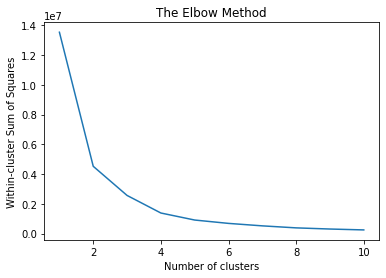

In [49]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [50]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(chennai_merged['Latitude'], chennai_merged['Longitude'], chennai_merged['Location'], chennai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Examine Clusters

In [51]:
chennai_merged.loc[chennai_merged['Cluster Labels'] == 0, chennai_merged.columns[[0]+[1]+[2] + [3] + list(range(5, chennai_merged.shape[1]))]]

,Location,Area,Price,Bedrooms,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Perungalathur,1310,55.00000,3.0,80.087955,0,Ice Cream Shop,Sports Club,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
29,Perungalathur,1931,81.08000,3.0,80.087955,0,Ice Cream Shop,Sports Club,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
278,Perungalathur,1350,60.66000,3.0,80.087955,0,Ice Cream Shop,Sports Club,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
279,Perungalathur,1320,59.32000,3.0,80.087955,0,Ice Cream Shop,Sports Club,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
280,Perungalathur,1038,46.64000,3.0,80.087955,0,Ice Cream Shop,Sports Club,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
3,Puzhal,1345,63.21000,3.0,80.203807,0,Sandwich Place,ATM,Playground,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
43,Puzhal,1382,64.95000,3.0,80.203807,0,Sandwich Place,ATM,Playground,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
44,Puzhal,1445,67.91000,3.0,80.203807,0,Sandwich Place,ATM,Playground,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
45,Puzhal,1551,72.89000,3.0,80.203807,0,Sandwich Place,ATM,Playground,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
46,Puzhal,1626,76.42000,3.0,80.203807,0,Sandwich Place,ATM,Playground,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater


In [52]:
chennai_merged.loc[chennai_merged['Cluster Labels'] == 1, chennai_merged.columns[[0]+[1]+[2] + [3] + list(range(5, chennai_merged.shape[1]))]]

,Location,Area,Price,Bedrooms,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
69,Maduravoyal,1479,96.12,3.0,80.166599,1,ATM,Movie Theater,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Motorcycle Shop
107,Madipakkam,1444,95.00,3.0,80.200129,1,ATM,Grocery Store,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
108,Madipakkam,1395,92.00,3.0,80.200129,1,ATM,Grocery Store,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
229,Madipakkam,1480,77.00,3.0,80.200129,1,ATM,Grocery Store,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
232,Madipakkam,1462,77.00,3.0,80.200129,1,ATM,Grocery Store,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
240,Madipakkam,1400,94.00,3.0,80.200129,1,ATM,Grocery Store,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
282,Madipakkam,1282,79.41,3.0,80.200129,1,ATM,Grocery Store,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
283,Madipakkam,1506,93.29,3.0,80.200129,1,ATM,Grocery Store,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
297,Madipakkam,1219,80.45,3.0,80.200129,1,ATM,Grocery Store,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
298,Madipakkam,1214,80.12,3.0,80.200129,1,ATM,Grocery Store,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater


In [53]:
chennai_merged.loc[chennai_merged['Cluster Labels'] == 2, chennai_merged.columns[[0]+[1]+[2] + [3] + list(range(5, chennai_merged.shape[1]))]]

,Location,Area,Price,Bedrooms,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Karapakkam,1307,82.05000,3.0,80.227720,2,Indian Restaurant,Hotel,Motorcycle Shop,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant
30,Karapakkam,1314,82.48999,3.0,80.227720,2,Indian Restaurant,Hotel,Motorcycle Shop,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant
31,Karapakkam,1358,85.25000,3.0,80.227720,2,Indian Restaurant,Hotel,Motorcycle Shop,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant
32,Karapakkam,1561,97.99000,3.0,80.227720,2,Indian Restaurant,Hotel,Motorcycle Shop,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant
33,Karapakkam,1296,81.36000,3.0,80.227720,2,Indian Restaurant,Hotel,Motorcycle Shop,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant
34,Karapakkam,1566,98.31000,3.0,80.227720,2,Indian Restaurant,Hotel,Motorcycle Shop,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant
35,Karapakkam,1564,98.18000,3.0,80.227720,2,Indian Restaurant,Hotel,Motorcycle Shop,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant
36,Karapakkam,1348,84.62000,3.0,80.227720,2,Indian Restaurant,Hotel,Motorcycle Shop,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant
37,Karapakkam,1599,100.00000,3.0,80.227720,2,Indian Restaurant,Hotel,Motorcycle Shop,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant
49,Karapakkam,1647,86.46000,3.0,80.227720,2,Indian Restaurant,Hotel,Motorcycle Shop,Platform,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant


In [54]:
chennai_merged.loc[chennai_merged['Cluster Labels'] == 3, chennai_merged.columns[[0]+[1]+[2] + [3] + list(range(5, chennai_merged.shape[1]))]]

,Location,Area,Price,Bedrooms,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Sholinganallur,1640,75.42000,3.0,80.21649,3,Pizza Place,ATM,Molecular Gastronomy Restaurant,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater,Motorcycle Shop
12,Sholinganallur,1952,80.00000,3.0,80.21649,3,Pizza Place,ATM,Molecular Gastronomy Restaurant,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater,Motorcycle Shop
18,Sholinganallur,1900,95.00000,3.0,80.21649,3,Pizza Place,ATM,Molecular Gastronomy Restaurant,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater,Motorcycle Shop
25,Sholinganallur,1645,97.46000,3.0,80.21649,3,Pizza Place,ATM,Molecular Gastronomy Restaurant,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater,Motorcycle Shop
62,Sholinganallur,1437,77.84999,3.0,80.21649,3,Pizza Place,ATM,Molecular Gastronomy Restaurant,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater,Motorcycle Shop
63,Sholinganallur,1310,78.41000,3.0,80.21649,3,Pizza Place,ATM,Molecular Gastronomy Restaurant,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater,Motorcycle Shop
70,Sholinganallur,1515,69.67000,3.0,80.21649,3,Pizza Place,ATM,Molecular Gastronomy Restaurant,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater,Motorcycle Shop
95,Sholinganallur,1951,93.87000,4.0,80.21649,3,Pizza Place,ATM,Molecular Gastronomy Restaurant,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater,Motorcycle Shop
96,Sholinganallur,1951,94.00000,4.0,80.21649,3,Pizza Place,ATM,Molecular Gastronomy Restaurant,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater,Motorcycle Shop
213,Sholinganallur,1546,75.00000,3.0,80.21649,3,Pizza Place,ATM,Molecular Gastronomy Restaurant,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater,Motorcycle Shop


In [55]:
chennai_merged.loc[chennai_merged['Cluster Labels'] == 4, chennai_merged.columns[[0]+[1]+[2] + [3] + list(range(5, chennai_merged.shape[1]))]]

,Location,Area,Price,Bedrooms,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
38,Madhavaram,1536,72.95999,3.0,80.232517,4,Smoke Shop,ATM,Playground,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
39,Madhavaram,1791,85.07000,3.0,80.232517,4,Smoke Shop,ATM,Playground,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater


In [56]:
chennai_merged.loc[chennai_merged['Cluster Labels'] == 5, chennai_merged.columns[[0]+[1]+[2] + [3] + list(range(5, chennai_merged.shape[1]))]]

,Location,Area,Price,Bedrooms,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
167,Chitlapakkam,1100,60.50,3.0,80.141383,5,Lake,ATM,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
292,Chitlapakkam,1038,62.28,3.0,80.141383,5,Lake,ATM,Molecular Gastronomy Restaurant,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater


In [57]:
chennai_merged.loc[chennai_merged['Cluster Labels'] == 6, chennai_merged.columns[[0]+[1]+[2] + [3] + list(range(5, chennai_merged.shape[1]))]]

,Location,Area,Price,Bedrooms,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
150,Pallikaranai,1310,63.95000,3.0,80.207769,6,Farmers Market,ATM,Motorcycle Shop,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
151,Pallikaranai,1340,65.30000,3.0,80.207769,6,Farmers Market,ATM,Motorcycle Shop,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
159,Pallikaranai,1150,71.30000,3.0,80.207769,6,Farmers Market,ATM,Motorcycle Shop,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
273,Pallikaranai,1944,97.97000,3.0,80.207769,6,Farmers Market,ATM,Motorcycle Shop,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
293,Pallikaranai,1390,63.92000,3.0,80.207769,6,Farmers Market,ATM,Motorcycle Shop,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
334,Pallikaranai,1200,66.00000,3.0,80.207769,6,Farmers Market,ATM,Motorcycle Shop,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
336,Pallikaranai,1150,63.24000,3.0,80.207769,6,Farmers Market,ATM,Motorcycle Shop,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
337,Pallikaranai,1150,63.25000,3.0,80.207769,6,Farmers Market,ATM,Motorcycle Shop,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
338,Pallikaranai,1200,65.98999,3.0,80.207769,6,Farmers Market,ATM,Motorcycle Shop,Pizza Place,Pharmacy,Optical Shop,North Indian Restaurant,Multiplex,Multicuisine Indian Restaurant,Movie Theater
